# **ML Project: Exoplanet Hunting in Deep Space**
**Alken Rrokaj r0772839, Fatjon Barçi r0732033**

### Motivation:
Exoplanet hunting in deep space is done by tracking a star over several months or years, to observe if there is a regular 'dimming' of the flux (the light intensity). This is light dimming, is evidence that there may be an orbiting body around the star, such as a planet. This star could be considered to be a 'candidate' system for further depth observations, for example by a satellite that captures light at a different wavelength, could solidify the belief that the candidate can in fact be 'confirmed'. Using a machine learning model is probably the only logical method of making this tedious task possible. 

### Dataset Description: 
[Exoplanet Hunting in Deep Space](https://www.kaggle.com/datasets/keplersmachines/kepler-labelled-time-series-data)

### Trainset:
* 5087 rows or observations.
* 3198 columns or features. // too many features. Try downsampling.
* Column 1 is the label vector. Columns 2 - 3198 are the flux values over time.
* 37 confirmed exoplanet-stars and 5050 non-exoplanet-stars.

### Testset:
* 570 rows or observations.
* 3198 columns or features.
* Column 1 is the label vector. Columns 2 - 3198 are the flux values over time.
* 5 confirmed exoplanet-stars and 565 non-exoplanet-stars. -->
<!-- 
### References:
Let’s find planets beyond our solar system & milky way … . Available at: https://medium.datadriveninvestor.com/lets-find-planets-beyond-our-solar-system-milky-way-galaxy-with-the-help-of-905dcfc95d3d (Accessed: November 7, 2022). 



## **Importing the Data**

In [397]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from scipy import optimize
from keras.models import Sequential
from keras.layers import Dense

import os

In [359]:
# read the train data
train_df = pd.read_csv('./exoTrain.csv')
train_df.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


## **Data Analysis**
Extracting Features

In [360]:
# extracting features per star measurement
train_df.T.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
0,3198.0,9.951370,160.703410,-1053.97,-103.3550,0.00,118.6675,504.46
1,3198.0,-7.424984,60.001869,-371.27,-25.1750,0.02,21.4275,252.64
2,3198.0,8.187151,281.832418,-874.95,-129.6000,0.00,158.3100,1274.59
3,3198.0,-4.644509,103.222642,-268.41,-78.1900,0.00,69.5175,370.29
4,3198.0,-14.235582,407.057716,-1808.76,-268.0625,0.06,315.3525,924.32


Seperate the data in two lists, based on whether they have exoplanets or not

In [361]:
exoplanets = []
no_exoplanets = []
for i in range(len(train_df)):
    if train_df['LABEL'][i] == 2:
        exoplanets.append(np.array(train_df.iloc[i,1:]))
    else:
        no_exoplanets.append(np.array(train_df.iloc[i,1:]))
        
no_exoplanets = np.array(no_exoplanets[1:])
exoplanets = np.array(exoplanets[1:])

In [362]:
print('no_exoplanets')
pd.DataFrame(no_exoplanets).T.describe().T.head()

no_exoplanets


,count,mean,std,min,25%,50%,75%,max
0,3197.0,4.212268,63.013855,-571.03,-20.49,0.0,21.88,600.11
1,3197.0,0.891442,41.128459,-334.82,-17.19,0.0,17.97,963.98
2,3197.0,4.850673,140.215612,-292.36,-112.75,0.0,128.85,1464.33
3,3197.0,33.159481,1675.513760,-6054.62,-43.81,0.0,45.29,93373.95
4,3197.0,-5.518486,187.767970,-607.96,-106.94,0.0,88.81,1547.14


In [363]:
print('exoplanets')
pd.DataFrame(exoplanets).T.describe().T.head()

exoplanets


,count,mean,std,min,25%,50%,75%,max
0,3197.0,-7.427932,60.011024,-371.27,-25.18,0.01,21.43,252.64
1,3197.0,8.189087,281.876484,-874.95,-129.67,-0.08,158.31,1274.59
2,3197.0,-4.646587,103.238723,-268.41,-78.19,-0.01,69.52,370.29
3,3197.0,-14.240660,407.121292,-1808.76,-268.09,0.02,315.40,924.32
4,3197.0,18.015580,155.684307,-402.60,-89.37,-0.02,122.85,1087.88


## **Data Visualization**

In [364]:
def plotTheData(data_name, title, ylimit, xlimit, rang=10):
    plt.figure(figsize=(15,5))  
    if rang == 0:
        rang = len(data_name)-1
    for i in range(0,rang):
        plt.plot(data_name[i])
        if ylimit != 0:
            plt.ylim([-1*ylimit,ylimit])
        if xlimit != 0:
            plt.xlim(0,xlimit);
    plt.title(label=title)
    plt.show()  

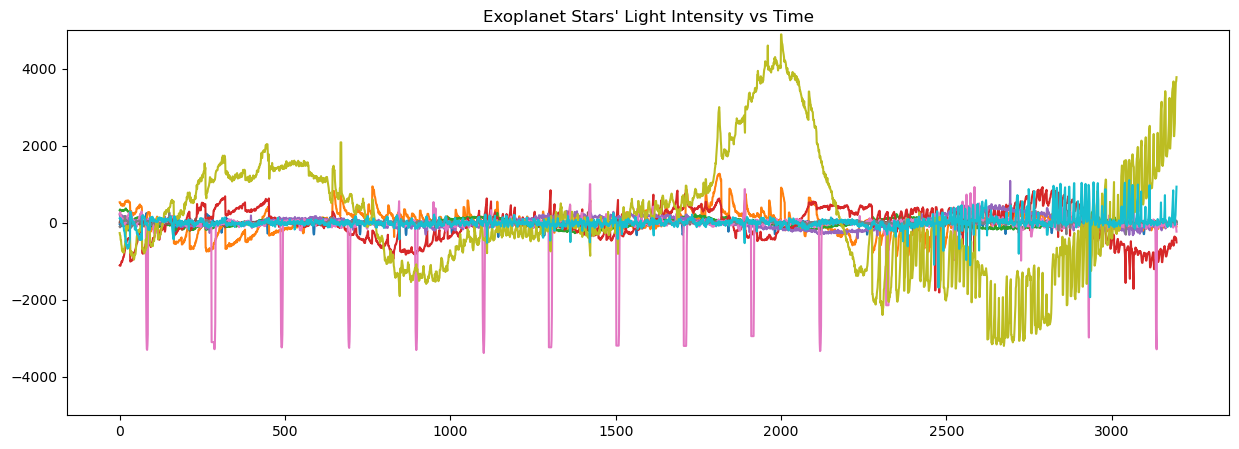

In [365]:
plotTheData(exoplanets,'Exoplanet Stars\' Light Intensity vs Time', 5000,0,10)

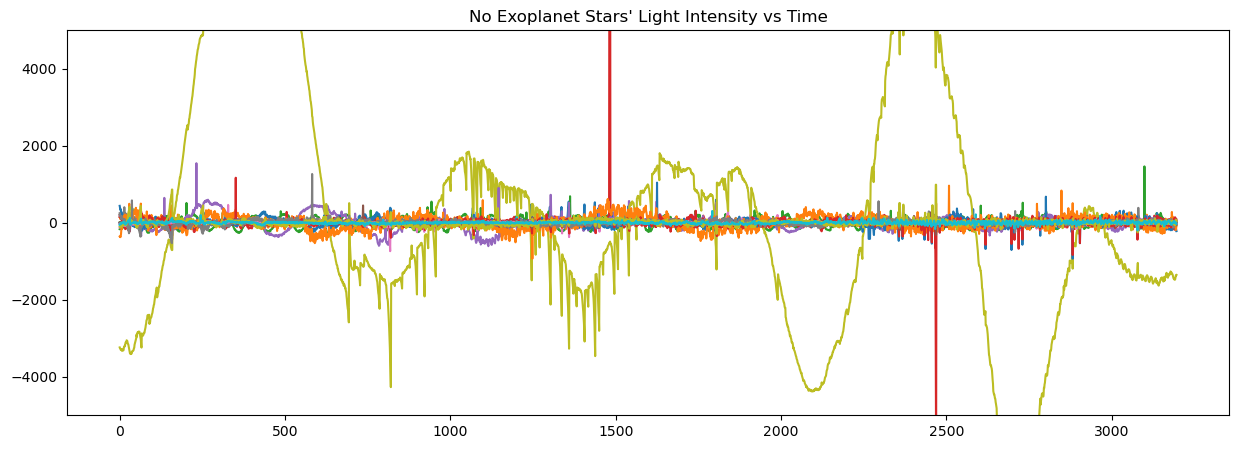

In [366]:
plotTheData(no_exoplanets,'No Exoplanet Stars\' Light Intensity vs Time', 5000,0,20)

Now we normalize the data in based on max intensity of each star, this would make the absolute magnitude more similar with the other stars.

In [367]:
def featureNormalizeArray(X_array):
    normalized_array = []
    for X in X_array:
        normalized_array.append(featureNormalize(X))
    return np.array(normalized_array)
        
# Code Assignment starts here
# EX1. Optional Exercises: 
# 3.1 Feature Normalization     
def featureNormalize(X):
    """
    Normalizes the features in X. returns a normalized version of X where
    the mean value of  xeach feature is 0 and the standard deviation
    is 1. This is often a good preprocessing step to do when working with
    learning algorithms.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n).
    
    Returns
    -------
    X_norm : array_like
        The normalized dataset of shape (m x n).
    """
    # You need to set these values correctly
    X_norm = X.copy()
    mu = np.zeros(X.shape)
    sigma = np.zeros(X.shape)

    # =========================== YOUR CODE HERE =====================
    mu = np.mean(X, axis=0)
    X_norm = X - mu

    sigma = np.std(X_norm, axis=0, ddof=1)
    X_norm /= sigma
    # ================================================================
    return X_norm
# Code Assignment stops here

In [368]:
normalized_exo = featureNormalizeArray(exoplanets)
normalized_no_exo = featureNormalizeArray(no_exoplanets)

In [369]:
ones = np.ones(len(normalized_no_exo), dtype=int)
twos = np.full(len(normalized_exo),2,dtype=int)

first = pd.DataFrame(normalized_exo)
first.insert(0,'LABEL',twos)

second = pd.DataFrame(normalized_no_exo)
second.insert(0,'LABEL',ones)      

normalized_whole = pd.concat([first,second],axis= 0)

In [370]:
print(first.head())

   LABEL         0         1         2         3         4         5  \
0      2 -0.524105 -0.439954 -0.851711 -0.544268 -1.197814 -1.089501   
1      2  1.860570  1.872206  1.793484  1.733848  1.590274  1.624154   
2      2  3.207775  3.409928  2.973657  2.932781  3.122729  3.073910   
3      2 -2.684628 -2.697843 -2.713465 -2.654883 -2.562650 -2.505984   
4      2  1.240230  0.934933  1.035072  1.090697  1.094808  0.964223   

          6         7         8  ...      3187      3188      3189      3190  \
0 -1.318459 -1.298129 -1.275467  ...  0.069120 -0.412959 -0.412959 -0.290981   
1  1.618833  1.696491  1.519711  ... -0.283383  0.018167  0.018167 -0.135091   
2  3.167189  3.060446  3.071198  ...  0.100317  0.008878  0.008878  0.336081   
3 -2.417214 -2.477073 -2.395673  ... -1.424955 -0.951607 -0.951607 -0.842499   
4  1.191157  1.031796  0.953689  ... -0.748088  0.079163  0.079163  0.074538   

       3191      3192      3193      3194      3195      3196  
0  0.042791  0.136440 

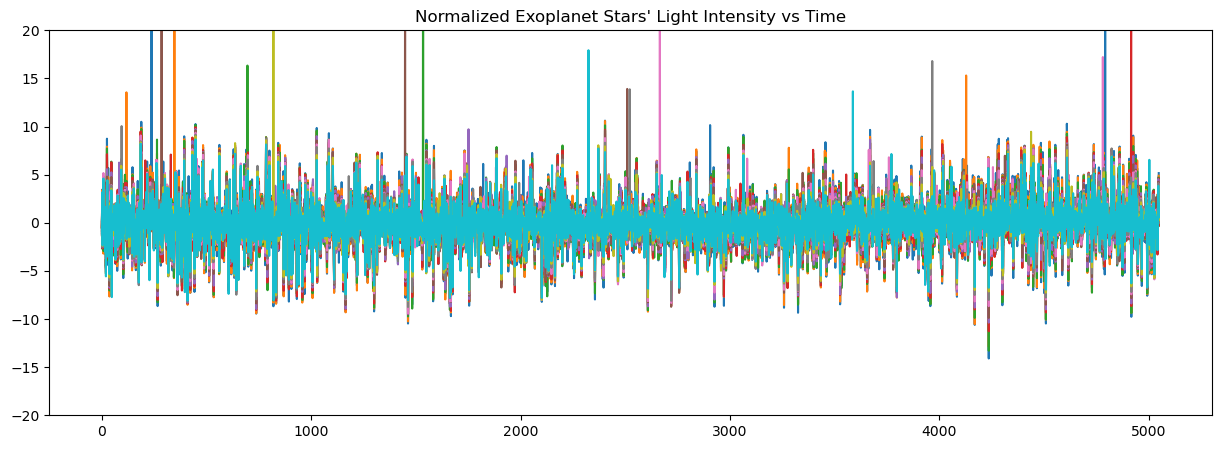

In [371]:
plotTheData(normalized_whole,'Normalized Exoplanet Stars\' Light Intensity vs Time',20,0)

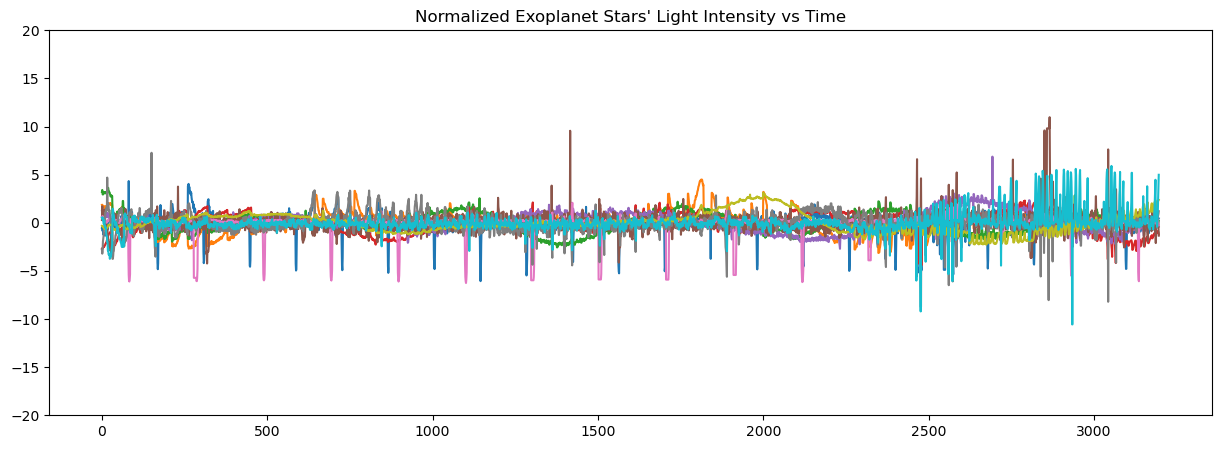

In [372]:
plotTheData(normalized_exo,'Normalized Exoplanet Stars\' Light Intensity vs Time',20,0)

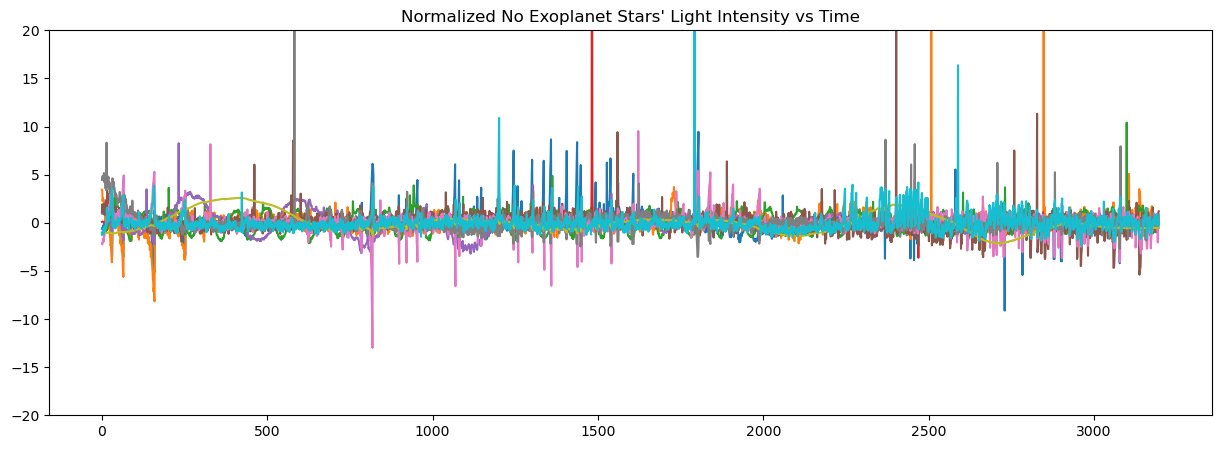

In [373]:
plotTheData(normalized_no_exo,'Normalized No Exoplanet Stars\' Light Intensity vs Time',20,0)

# **Data Balancing**
In this part of code we balance the classes using the SMOTE technique. 

In [374]:
smote = SMOTE (random_state = 69) 


First we separate the data and the labels.


In [375]:
x_train = normalized_whole.drop(['LABEL'], axis=1)
y_train = normalized_whole['LABEL']

This line of code applies the SMOTE oversampling technique to the training data, which is stored in x_train and y_train. The fit_sample method fits the SMOTE model to the training data and generates synthetic minority class samples, which are then combined with the original training data. The resulting oversampled dataset is stored in x_train and y_train. Finally the oversampled data is split into a new training and test set considering that the test set is also very imbalanced.

In [376]:
x_train, y_train = smote.fit_resample (x_train, y_train.ravel ())
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.3, random_state=1)

# **Machine Learning**

## **Logistic Regression**

In [377]:
# Code assignment starts here
def sigmoid(z):
    """
    Compute sigmoid function given the input z.
    
    Parameters
    ----------
    z : array_like
        The input to the sigmoid function. This can be a 1-D vector 
        or a 2-D matrix. 
    
    Returns
    -------
    g : array_like
        The computed sigmoid function. g has the same shape as z, since
        the sigmoid is computed element-wise on z.
    """    
    z = np.array(z)
    
    # You need to return the following variables correctly 
    g = np.zeros(z.shape)

    # ====================== YOUR CODE HERE ======================
    g = 1 / (1 + np.exp(-z))
    # =============================================================
    return g

# Code assignment ends here

In [378]:
# Code assignment starts here
def costFunction(theta, X, y):
    """
    Compute cost and gradient for logistic regression. 
    
    Parameters
    ----------
    theta : array_like
        The parameters for logistic regression. This a vector
        of shape (n+1, ).
    
    X : array_like
        The input dataset of shape (m x n+1) where m is the total number
        of data points and n is the number of features. We assume the 
        intercept has already been added to the input.
    
    y : arra_like
        Labels for the input. This is a vector of shape (m, ).
    
    Returns
    -------
    J : float
        The computed value for the cost function. 
    
    grad : array_like
        A vector of shape (n+1, ) which is the gradient of the cost
        function with respect to theta, at the current values of theta.
    """
    # Initialize some useful values
    m = y.size  # number of training examples

    # You need to return the following variables correctly 
    J = 0
    grad = np.zeros(theta.shape)

    # ====================== YOUR CODE HERE ======================
    h = sigmoid(X.dot(theta.T))
    
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    grad = (1 / m) * (h - y).dot(X)
    
    
    # =============================================================
    return J, grad
# Code assignment ends here

In [379]:
# Code assignment starts here
def predict(theta, X):
    """
    Predict whether the label is 0 or 1 using learned logistic regression.
    Computes the predictions for X using a threshold at 0.5 
    (i.e., if sigmoid(theta.T*x) >= 0.5, predict 1)
    
    Parameters
    ----------
    theta : array_like
        Parameters for logistic regression. A vecotor of shape (n+1, ).
    
    X : array_like
        The data to use for computing predictions. The rows is the number 
        of points to compute predictions, and columns is the number of
        features.

    Returns
    -------
    p : array_like
        Predictions and 0 or 1 for each row in X. 
    
    Instructions
    ------------
    Complete the following code to make predictions using your learned 
    logistic regression parameters.You should set p to a vector of 0's and 1's    
    """
    m = X.shape[0] # Number of training examples

    # You need to return the following variables correctly
    p = np.zeros(m)

    # ====================== YOUR CODE HERE ======================

    p = np.round(sigmoid(X.dot(theta.T)))
    
    # ===Adjusment to code since our labels are 1 2 and not 0 1 ==
    
    p = [x+1 for x in p]
    
    # ============================================================
    
    return p
# Code assignment ends here

In [380]:
test_df = pd.read_csv('./exoTest.csv')
df_test_x = test_df.drop(['LABEL'], axis=1)
df_test_y = test_df['LABEL']

In [382]:
m,n = x_test.shape 
# Code assignment starts here
initial_theta = np.zeros(n)
res = optimize.minimize(costFunction,
                        initial_theta,
                        (x_train, y_train),
                        jac=True,
                        method='TNC',
                        options={'maxiter': 400})
# Code assignment ends here

/var/folders/_m/x84dj46s4v9g8sm63vp2fwmr0000gn/T/ipykernel_8216/1126744406.py:3: DeprecationWarning: 'maxiter' has been deprecated in favor of 'maxfun' and will be removed in SciPy 1.11.0.
  res = optimize.minimize(costFunction,
/var/folders/_m/x84dj46s4v9g8sm63vp2fwmr0000gn/T/ipykernel_8216/2681179540.py:39: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))


Now testing the model on the provided test set.

In [383]:
theta = res.x
results = predict(theta,df_test_x)
accuracy = accuracy_score(df_test_y, results)
print("The accuracy of the model is: " + str(accuracy))
conf = confusion_matrix(df_test_y, results)
print(conf)

The accuracy of the model is: 0.4649122807017544
[[261 304]
 [  1   4]]


/var/folders/_m/x84dj46s4v9g8sm63vp2fwmr0000gn/T/ipykernel_8216/3460935215.py:24: RuntimeWarning: overflow encountered in exp
  g = 1 / (1 + np.exp(-z))


Now testing the model on the generated test set from the SMOTE technique.

In [384]:
other_results = predict(theta,x_test)
other_accuracy = accuracy_score(y_test, other_results)
print("The accuracy of the model is: " + str(other_accuracy))
confusion = confusion_matrix(y_test, other_results)
print(confusion)

The accuracy of the model is: 0.7313531353135313
[[ 706  814]
 [   0 1510]]


## **Neural Network**

In [450]:
model = Sequential()
model.add(Dense(units = 10, activation = 'relu', input_dim = x_train.shape[1]))
model.add(Dense(units = 10, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

train = model.fit(x_train , y_train , validation_data=(x_test,y_test), epochs=20, verbose=1)


Epoch 1/20
221/221 [==============================] - 5s 13ms/step - loss: -150.1143 - accuracy: 0.4318 - val_loss: -534.1671 - val_accuracy: 0.4960
Epoch 2/20
221/221 [==============================] - 2s 8ms/step - loss: -1962.4656 - accuracy: 0.4992 - val_loss: -4662.1826 - val_accuracy: 0.5017
Epoch 3/20
221/221 [==============================] - 2s 8ms/step - loss: -10081.7129 - accuracy: 0.4993 - val_loss: -18068.1387 - val_accuracy: 0.5017
Epoch 4/20
221/221 [==============================] - 2s 8ms/step - loss: -28907.2500 - accuracy: 0.4993 - val_loss: -44209.4961 - val_accuracy: 0.5017
Epoch 5/20
221/221 [==============================] - 1s 7ms/step - loss: -61374.5977 - accuracy: 0.4993 - val_loss: -85778.6406 - val_accuracy: 0.5017
Epoch 6/20
221/221 [==============================] - 2s 7ms/step - loss: -109565.8984 - accuracy: 0.4993 - val_loss: -144933.0312 - val_accuracy: 0.5017
Epoch 7/20
221/221 [==============================] - 1s 5ms/step - loss: -175828.3750 - ac

In [452]:
prediction = model.predict(df_test_x)

prediction = np.round(prediction)
# prediction = [x+1 for x in prediction]

# Get the confusion matrix
cm = confusion_matrix(df_test_y, prediction)

print(cm)

# Get the classification report
report = classification_report(df_test_y, prediction)

print(report)


18/18 [==============================] - 0s 9ms/step
[[565   0]
 [  5   0]]
              precision    recall  f1-score   support

           1       0.99      1.00      1.00       565
           2       0.00      0.00      0.00         5

    accuracy                           0.99       570
   macro avg       0.50      0.50      0.50       570
weighted avg       0.98      0.99      0.99       570



/Users/barci/micromamba/envs/spai/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/barci/micromamba/envs/spai/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/barci/micromamba/envs/spai/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [453]:
prediction1 = model.predict(x_test)

prediction1 = np.round(prediction1)
#prediction = [x+1 for x in prediction]

# Get the confusion matrix
con = confusion_matrix(y_test, prediction1)

print(con)

# Get the classification report
report1 = classification_report(y_test, prediction1)

print(report1)

95/95 [==============================] - 0s 4ms/step
[[1520    0]
 [1510    0]]
              precision    recall  f1-score   support

           1       0.50      1.00      0.67      1520
           2       0.00      0.00      0.00      1510

    accuracy                           0.50      3030
   macro avg       0.25      0.50      0.33      3030
weighted avg       0.25      0.50      0.34      3030



/Users/barci/micromamba/envs/spai/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/barci/micromamba/envs/spai/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/barci/micromamba/envs/spai/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu